In [1]:
import pandas as pd
from surprise import Reader, Dataset, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

In [2]:
# Dateipfade
train_file_path = '/Users/kilianlorenz/Uni/Big_Data/Data/2019-Oct_trainings_data.csv'
test_file_path = '/Users/kilianlorenz/Uni/Big_Data/Data/2019-Oct_test_data.csv'

In [3]:
# Einlesen der Daten
train_data = pd.read_csv(train_file_path, nrows = 800000)
test_data = pd.read_csv(test_file_path, nrows = 200000)

In [4]:
# Erzeugen von impliziten Bewertungen basierend auf dem Kaufereignis
train_data['rating'] = train_data['event_type'].apply(lambda x: 1 if x == 'purchase' else 0)
test_data['rating'] = test_data['event_type'].apply(lambda x: 1 if x == 'purchase' else 0)

In [5]:
# Vorbereiten der Daten für Surprise
reader = Reader(rating_scale=(0, 1))  # Rating-Skala anpassen, da wir binäre Bewertungen haben
train_dataset = Dataset.load_from_df(train_data[['user_id', 'product_id', 'rating']], reader)

In [6]:
# Trainingsdatensatz erstellen
trainset = train_dataset.build_full_trainset()

In [7]:
# Modell initialisieren und trainieren
model = SVD()
model.fit(trainset)

In [8]:
# Testdatensatz vorbereiten
testset = [(uid, iid, r) for uid, iid, r in zip(test_data['user_id'], test_data['product_id'], test_data['rating'])]

In [9]:
# Vorhersagen auf Testdaten machen
predictions = model.test(testset)

In [10]:
# Bewertung des Modells
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

RMSE: 0.1564
MAE:  0.0437


In [11]:
# Ausgabe der Bewertungsergebnisse
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

Root Mean Squared Error: 0.1563586187836663
Mean Absolute Error: 0.04374558983652574


In [12]:
import joblib

In [13]:
model_filename = '/Users/kilianlorenz/Uni/Big_Data/Data/recommender_model.pkl'
joblib.dump(model, model_filename)

['/Users/kilianlorenz/Uni/Big_Data/Data/recommender_model.pkl']

In [ ]:
model_filename = "/Users/kilianlorenz/Uni/Big_Data/Data/recommender_model.pkl"

In [ ]:
# Lade das gespeicherte Modell
loaded_model = joblib.load(model_filename)


In [ ]:
# Trainingsdaten mit neuen Daten aktualisieren
updated_train_dataset = Dataset.load_from_df(new_data[['user_id', 'product_id', 'rating']], reader)
updated_trainset = updated_train_dataset.build_full_trainset()

In [ ]:
# Modell aktualisieren
loaded_model.fit(updated_trainset)

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from surprise.model_selection import cross_validate

In [15]:
# Modell initialisieren (Sie haben bereits ein trainiertes Modell)
model = SVD()

In [27]:
train_sizes = [1000, 5000, 10000, 20000, 50000, 100000]

In [28]:
# Leere Listen für die speichern von RMSE und MAE
rmse_scores = []
mae_scores = []

In [29]:
for train_size in train_sizes:
    # Teilmenge der Trainingsdaten auswählen
    subset_data = train_data.sample(n=train_size, random_state=42)
    
    # Vorbereiten der Daten für Surprise
    reader = Reader(rating_scale=(0, 1))
    train_dataset = Dataset.load_from_df(subset_data[['user_id', 'product_id', 'rating']], reader)
    trainset = train_dataset.build_full_trainset()
    
    # Modell trainieren
    model.fit(trainset)
    
    # Testdaten vorbereiten
    testset = [(uid, iid, r) for uid, iid, r in zip(test_data['user_id'], test_data['product_id'], test_data['rating'])]
    
    # Vorhersagen auf Testdaten machen
    predictions = model.test(testset)
    
    # Berechnen von RMSE und MAE
    rmse = accuracy.rmse(predictions)
    mae = accuracy.mae(predictions)
    
    rmse_scores.append(rmse)
    mae_scores.append(mae)

RMSE: 0.1568
MAE:  0.0367
RMSE: 0.1567
MAE:  0.0441
RMSE: 0.1567
MAE:  0.0446
RMSE: 0.1568
MAE:  0.0438
RMSE: 0.1565
MAE:  0.0464
RMSE: 0.1565
MAE:  0.0458


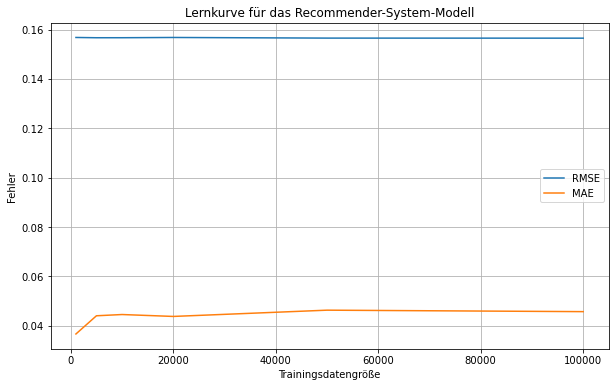

In [30]:
# Lernkurve zeichnen
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, rmse_scores, label='RMSE')
plt.plot(train_sizes, mae_scores, label='MAE')
plt.xlabel('Trainingsdatengröße')
plt.ylabel('Fehler')
plt.legend()
plt.title('Lernkurve für das Recommender-System-Modell')
plt.grid(True)
plt.show()

In [33]:
import pickle
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [35]:
model_file_path = '/Users/kilianlorenz/Uni/Big_Data/Data/recommender_model.pkl'
with open(model_file_path, 'rb') as model_file:
    model = pickle.load(model_file)


UnpicklingError: invalid load key, '\x1e'.

In [36]:
test_data_file_path = '/Users/kilianlorenz/Uni/Big_Data/Data/2019-Oct_test_data.csv'
test_data = pd.read_csv(test_data_file_path)

In [37]:
true_labels = test_data['rating'].tolist()
predicted_labels = []

KeyError: 'rating'

In [ ]:
for index, row in test_data.iterrows():
    user_id = row['user_id']
    product_id = row['product_id']
    
    # Verwenden Sie das Modell, um die Bewertung (Empfehlung) für die Kombination vorherzusagen
    prediction = model.predict(user_id, product_id)
    
    # Fügen Sie die vorhergesagte Bewertung zur Liste hinzu
    predicted_labels.append(round(prediction.est))  # Runde auf 0 oder 1


In [ ]:
cm = confusion_matrix(true_labels, predicted_labels)


In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Nicht empfohlen', 'Empfohlen'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Konfusionsmatrix für das Recommender-System-Modell')
plt.show()